In [86]:
import numpy as np
import pandas as pd
import math

from sklearn.linear_model import LinearRegression

Сказывается полученное образование, пока тянет на формулы и законы физики. Перебирал разные законы. Во всех них хотелось бы, чтобы некоторая переменная находилась в знаменателе, а обратная величина имела некое обснованное физическое явление. Например сопротивление и проводимость. Суть некую нелинейную зависимость (обратную, или иную) превратить в линейную заменой переменных (созданием нового столбца в датафрейме).

Но, главное суть уловил. Можно и пофантазировать.
Представим нашу планету, она крутится вокруг своей оси. На ней есть разные города, находящиеся или ближе к экватору, или ближе к полюсам. Люди ходят в горы, или работают в песчаных карьерах. :) Рассмотрим вращательное движение твердого тела вокруг неподвижной оси. Есть такие известные понятия, как угловая скорость тела при равномерном вращении. Формула такая 
$$\varphi = \varphi_0\pm\omega t$$
Также существует понятие линейной и угловой скорости 
$$v=\omega R$$
В свою очередь частота вращения
$$\omega =  \frac{2\pi}{T}$$
T - период вращения (в данном примере земные сутки).
Можно фантазировать, что R можно получить по гео-метке и следовательно он может изменяться (это главное).
$$\varphi_0$$ - может быть, к примеру положение относительно Гринвича, и мы знаем, темно или светло в момент измерений.

Применение к трекингу (к статистике, да и выдвижению гипотез): ведь для людей гео-локация это наручные часы,  для машин это навигаторы. По отношению к земле, которая, как правило, вращается линейно ;) пешеход будет вращаться и иметь угловую скорость практически не отличающуюся от скорости движения земли и мы можем его отличать от быстро движущихся нелинейных объектов.

Но, пусть у нас будет не земля. А просто модель земли, в очень-очень маленьком масштабе (учебном масштабе). Воздух откачивать не будем. :)

Итак мы готовы создать первичный датасет. Интересоваться будем угловой скоростью.


In [103]:
# Создаём сэмпл
n_samples = 500

phi_0 = math.pi/3.0
#phi_0= np.random.choice(2.0*math.pi,n_samples)/1000.0 + math.pi/3.0
velocity = np.random.choice(1000, n_samples) + 5
radius = np.random.choice(20, n_samples) + 5
timestamp = np.random.choice(1583186440, n_samples) + 1000
angvel = velocity / radius
phi = (2.0*math.pi) * np.random.choice(1000, n_samples)/30000.0 + phi_0 + angvel * 1  

#angvel = velocity / radius

data = pd.DataFrame({'velocity': velocity, 'radius': radius, 'timestamp': timestamp, 'phi': phi}) #, 'angvel': angvel})
data.sample(10)

,velocity,radius,timestamp,phi
69,690,19,435716986,37.462471
251,185,22,1184743091,9.590958
87,897,17,1168278555,53.816930
22,676,10,1577295814,68.804068
308,955,21,1293240839,46.687379
419,117,12,1502014853,10.942758
82,315,17,1234300326,19.697037
410,714,15,1475149266,48.695578
2,420,22,643855288,20.180623
238,793,15,1324369274,54.095239


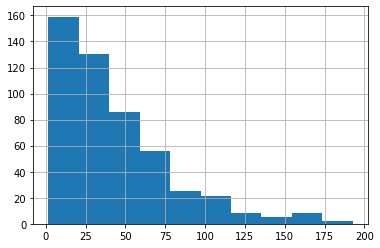

In [104]:
data.phi.hist()

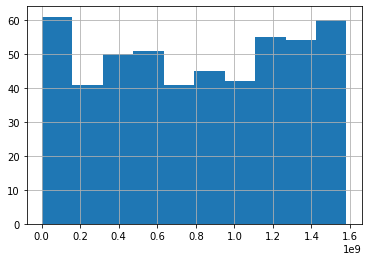

In [105]:
data.timestamp.hist()

Угловая скорость на самом деле обратно пропорциональна радиусу. У нас заданы радиус и скорость.
Проверим на линейность по отношению:
   к радиусу (должно показать ошибку).
А потом введем новый столбец (или сразу), который будет называться частота вращения, она обратно пропорциональна радиусу
(и ошибки не должно быть на новую переменную).

Конечно, надо поиграться параметрами так, чтобы обратная функция не апроксимировалась прямой. Так оно и случилось.

Как я не менял радиус, линейность по отношению к радиусу менялась сильно.
А по отношению к обратной величине - нет.

In [106]:
from sklearn.metrics import mean_absolute_error

X = data[['velocity', 'radius', 'timestamp']]
y = data['phi']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['velocity', 'radius', 'timestamp']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [ 8.39057258e-02 -3.29843432e+00  8.36159649e-11]
Bias: 50.34529016317308
Error: 11.112737236781701


In [116]:
from sklearn.metrics import mean_absolute_error

X = data[['radius']]
y = data['phi']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['radius']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-3.78805654]
Bias: 98.36225109976868
Error: 20.605906107603303


In [107]:
# Создаем новый признак 1
data['angvel'] = data['velocity'] / data['radius']
data.head(5)

,velocity,radius,timestamp,phi,angvel
0,33,5,366131839,7.802183,6.600000
1,398,10,643772119,41.030038,39.800000
2,420,22,643855288,20.180623,19.090909
3,187,22,106003199,9.570026,8.500000
4,494,18,491213770,28.506722,27.444444


In [108]:
X = data[['angvel']]
y = data['phi']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['angvel']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [1.00009201]
Bias: 1.1452161389656297
Error: 0.050898434140175156


Как на лекции, в ноль ошибку не довелось убрать, но заметил, если изменять данные по радиусу, то в первом случае ошибка сильно пляшет, а во втором ошибка, как правило примерно, около 0.05 по значению.

Попробуем ввести ещё одну переменную, не обратный радиус умноженный на скорость.
А, исключительно, обратный радиус. И сравним с angvel при том же датасете.

In [109]:
# Создаем новый признак 2
data['reverse_radius'] = 1.0 / data['radius']
data.head(5)

,velocity,radius,timestamp,phi,angvel,reverse_radius
0,33,5,366131839,7.802183,6.600000,0.200000
1,398,10,643772119,41.030038,39.800000,0.100000
2,420,22,643855288,20.180623,19.090909,0.045455
3,187,22,106003199,9.570026,8.500000,0.045455
4,494,18,491213770,28.506722,27.444444,0.055556


In [111]:
X = data[['reverse_radius']]
y = data['phi']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['reverse_radius']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [522.07113272]
Bias: -0.8748476306910504
Error: 20.368074826637706


Интересно, получилось! Минимальная ошибка получается, если линеаризировать угловую скорость (phi) и угловую скорость.

In [113]:
import matplotlib.pyplot as plt

$$ \varphi $$ и $$ \omega = \frac{v}{R} $$

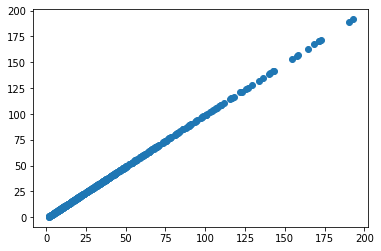

In [114]:
plt.scatter(data.phi, data.angvel)
plt.show()

$$ \varphi $$ и $$ \frac{1}{R} $$

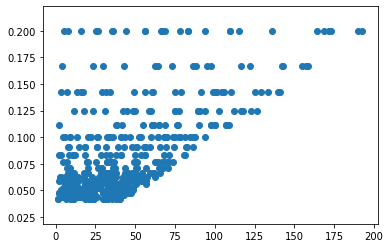

In [115]:
plt.scatter(data.phi, data.reverse_radius)
plt.show()

$$ \varphi $$ и $$ R $$

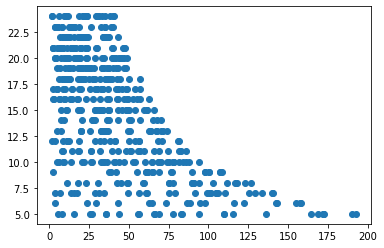

In [117]:
plt.scatter(data.phi, data.radius)
plt.show()